In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir('.')

["Haberman's Survival EDA.ipynb",
 '.ipynb_checkpoints',
 'haberman.csv',
 'matplotlib Quick Reference.ipynb',
 'numpy - Quick Reference.ipynb']

**Attribute Information:**

- Age of patient at time of operation (numerical)<br>
- Patient's year of operation (year - 1900, numerical)<br>
- Number of positive axillary nodes detected (numerical)<br>
- Survival status (class attribute) 1 = the patient survived 5 years or longer; 2 = the patient died within 5 year

# Objective:
Our mission here is to determine whether or not a patient is going to survive more than 5 years based on the given data : his age, year of operation and the number of postive axillary nodes detected. Basically, we will need to study the co-relations between the different features and the output variable.

In [3]:
data = pd.read_csv('haberman.csv', header = None)
data = data.rename(columns={0: "Age", 1: 'Op_Year', 2: 'axil_nodes', 3: 'Surv_status'})

data.head(10)

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
data.shape   # 306 rows and 4 columns or features

(306, 4)

In [5]:
a = data['Surv_status'].value_counts()
a

1    225
2     81
Name: Surv_status, dtype: int64

In [6]:
# This is a imbalance dataset.
print('Total percentage of patient survived are {0:.2f}'.format(a[1]/a.sum()*100))

print('\nTotal patient died are {0:.2f}'.format(a[2]/a.sum()*100))

Total percentage of patient survived are 73.53

Total patient died are 26.47


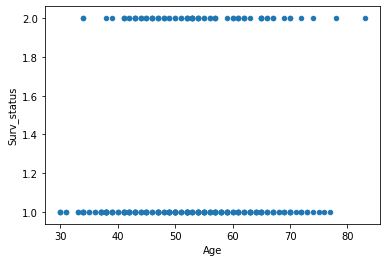

In [7]:
# we see that people recover from all ages i.e 30 to 80.
# There is no individual which is less than 30 years old and is suffering from cancer.

data.plot(x = 'Age',y = 'Surv_status',kind = 'scatter')

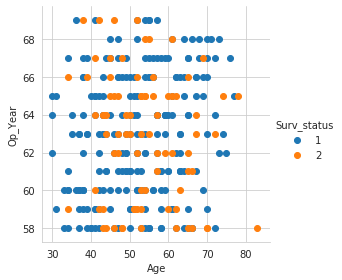

In [8]:
# We could not see any pattern when we can say that Age and Op_year together could not segregate and separate the Survival status.

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Surv_status", height=4) \
   .map(plt.scatter, "Age", "Op_Year") \
   .add_legend();
plt.show();

In [9]:
data["Survival"] = data['Surv_status'].map({1:"Yes", 2:"No"})
data.drop(['Surv_status'], axis = 1, inplace = True)
data.head(10)

,Age,Op_Year,axil_nodes,Survival
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,No
8,34,66,9,No
9,34,58,30,Yes


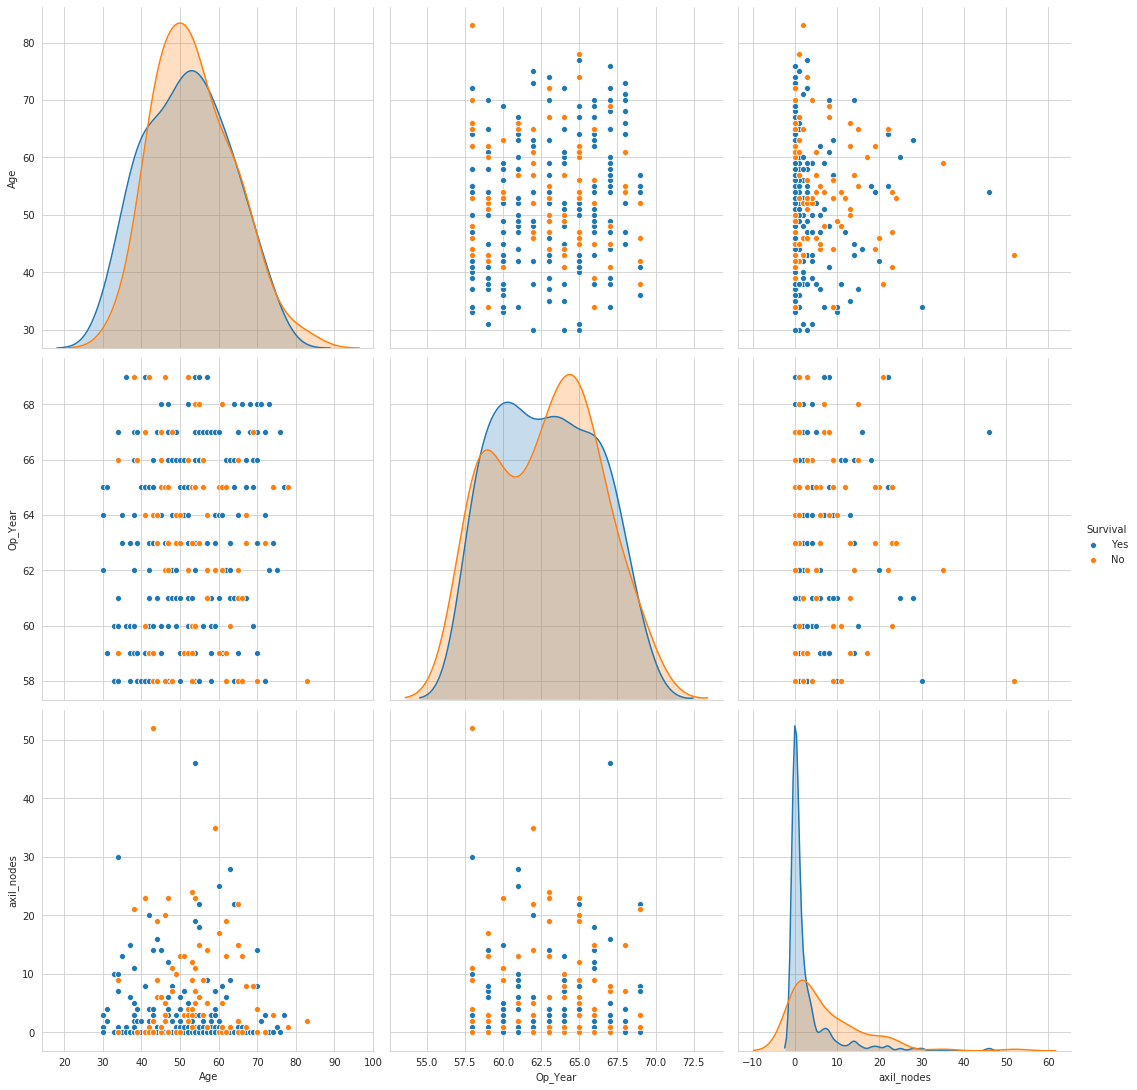

In [10]:
# We plot pairplot first because it provides an overall relation between each feature.
# It is a good start because we got an idea what each feature is like and we can later focus on certain features.

sns.pairplot(data, hue = 'Survival',height = 5)

# Observation
- The PDF of Age is almost overlapping. That means the patient's Age is not an essential feature to recognise whether a person will survive or not.
- Even Operation years are overlapping.
- Axil nodes are overlapping but not as much as it is for other features. Let us create a univariate analysis to support your conclusion.
- In Row 1 and column 3, it can be observed that patient who are between age groups of 30-40, 50-60 years and have less axillary nodes are likely to survive.

## Verdict
**PLOT Row 1 and column 3**
- if ( (age > 30 and age < 40) and axil_nodes < 10):
        Patient Survived (with high accuracy)
- if ( (age > 50 and age < 60) and axil_nodes < 5):
        Patient survived (with high accuracy)
        
**PLOT Row 2 and column 6**
- if( Op_year == 58 and Op_year == 65):
        Very less chances that patient survives

In [11]:
temp = data[(data['Age'] > 30) & (data['Age'] < 40)]
temp = temp[temp['axil_nodes'] < 10]
acc  = temp['Survival'].value_counts()
print('Accuracy on Verdict_1 =', acc['Yes'] / (acc['Yes'] + acc['No'])*100)

temp = data[(data['Age'] > 50) & (data['Age'] < 60)]
temp = temp[temp['axil_nodes'] < 5]
acc  = temp['Survival'].value_counts()
print('Accuracy on Verdict_2 =', acc['Yes'] / (acc['Yes'] + acc['No'])*100)

temp = data[(data['Op_Year'] == 58) | (data['Op_Year'] == 65)]
acc  = temp['Survival'].value_counts()
print('A total of',acc['No'],'patient died in two years')
print('Total patients died in 11 Years is',data[data['Survival']=='No'].Survival.count())

Accuracy on Verdict_1 = 90.0
Accuracy on Verdict_2 = 84.12698412698413
A total of 25 patient died in two years
Total patients died in 11 Years is 81


We got an accurary of 90% and 84% on first two verdicts which is very good as data is random and jumbled. Moreover we are only exploring data to understand its nature.

For Verdict 3, we conclude that majority of people died in 1958 and 1965. We could investigate why we experience more cancer death that time. Nearly 31% (= 25/81) of total patient ever died belongs to these two years.

In [12]:
data_survived = data.loc[ data['Survival'] == 'Yes' ]
data_died = data.loc[ data['Survival'] == 'No' ]

In [13]:
data_survived.head()

,Age,Op_Year,axil_nodes,Survival
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [14]:
data_died.head()

,Age,Op_Year,axil_nodes,Survival
7,34,59,0,No
8,34,66,9,No
24,38,69,21,No
34,39,66,0,No
43,41,60,23,No


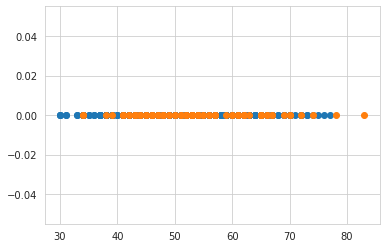

In [15]:
plt.plot(data_survived['Age'], np.zeros_like(data_survived['Age']), 'o')
plt.plot(data_died['Age'], np.zeros_like(data_died['Age']), 'o')

# This is a 1D plot but we can't conclude on anything.
# So it is preferred to use HISTOGRAM in order to make concrete conclusions.

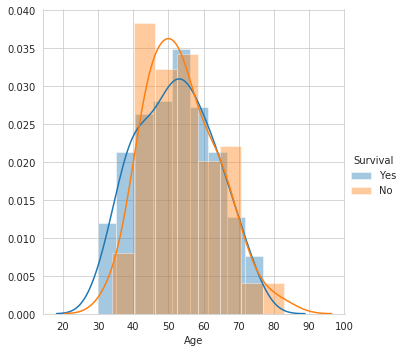

In [16]:
sns.FacetGrid(data, hue="Survival", height=5).map(sns.distplot, "Age").add_legend();
plt.show();

# We saw this before in PAIRPLOT. And we said it is overlapping here we can't make any conclusion.

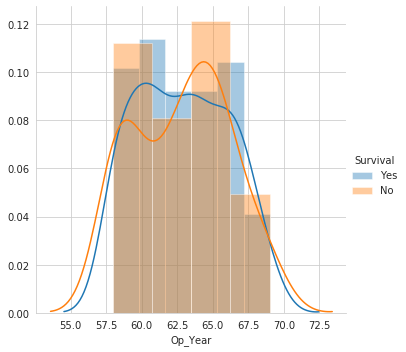

In [17]:
sns.FacetGrid(data, hue="Survival", height=5).map(sns.distplot, "Op_Year").add_legend();
plt.show();

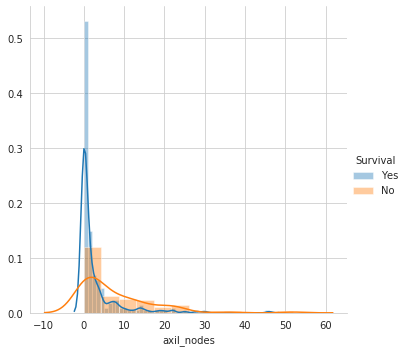

In [18]:
sns.FacetGrid(data, hue="Survival", height=5).map(sns.distplot, "axil_nodes").add_legend();
plt.show();

# Overlapping is least in case of axil_nodes hence we can further investigate it and comment on whether a patient
# would survive or not.

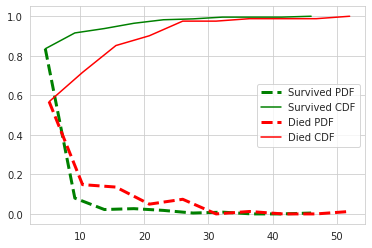

In [19]:
counts, bin_edges = np.histogram(data_survived['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, 'g--',   label = 'Survived PDF', linewidth = 3)
plt.plot(bin_edges[1:], cdf, 'g', label = 'Survived CDF')
plt.legend()



counts, bin_edges = np.histogram(data_died['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, 'r--'   ,label = 'Died PDF', linewidth = 3)
plt.plot(bin_edges[1:], cdf, 'r' ,label = 'Died CDF')
plt.legend()

# Observation
- When axillary nodes are less (look at the CDF), we can say that number of people who survived it more.
- CDF for small number of nodes (let's say 5) is above 80%. We can say that **80% of people with 5 0r less nodes survived.** (By defination of CDF).
- As the axillary nodes increase, (let's say >25) the CDF converge into each other. Hence we can't comment upon accuracy. If we say nodes less than 25 survived (as CDF of Survived it nearly 100%) but there is 100% of the patients who died with 25 or less nodes.

In [20]:
accuracy_survived = []
accuracy_died = []
for i in [5,10,15,20]:
    print()
    print('******** Number of Auxiliary Nodes',i,'********')
    a1 = data_survived[data_survived['axil_nodes'] > i].Survival.count()
    b1 = data_survived[data_survived['axil_nodes'] < i].Survival.count()
    print("Person with less than 20 Nodes and survived -",a1)
    print("Person with less than 20 Nodes and survived -",b1)
    a2 = data_died[data_died['axil_nodes'] > i].Survival.count()
    b2 = data_died[data_died['axil_nodes'] < i].Survival.count()
    print("Person with less than 20 Nodes and Died     -",a2)
    print("Person with less than 20 Nodes and Died     -",b2)
    accuracy_survived.append('{0:.2f}'.format(b1/(b1+b2)))
    accuracy_died.append('{0:.2f}'.format(a2/(a1+a2)))


******** Number of Auxiliary Nodes 5 ********
Person with less than 20 Nodes and survived - 35
Person with less than 20 Nodes and survived - 188
Person with less than 20 Nodes and Died     - 35
Person with less than 20 Nodes and Died     - 42

******** Number of Auxiliary Nodes 10 ********
Person with less than 20 Nodes and survived - 17
Person with less than 20 Nodes and survived - 206
Person with less than 20 Nodes and Died     - 23
Person with less than 20 Nodes and Died     - 57

******** Number of Auxiliary Nodes 15 ********
Person with less than 20 Nodes and survived - 10
Person with less than 20 Nodes and survived - 214
Person with less than 20 Nodes and Died     - 12
Person with less than 20 Nodes and Died     - 67

******** Number of Auxiliary Nodes 20 ********
Person with less than 20 Nodes and survived - 6
Person with less than 20 Nodes and survived - 218
Person with less than 20 Nodes and Died     - 8
Person with less than 20 Nodes and Died     - 72


In [21]:
# if we conclude that patients with 5 nodes or less can survive then this statement is 82% correct

for i,v in enumerate(accuracy_survived):
    print('For '+str(i*5+5) + ' nodes, We get an accuracy of ' + accuracy_survived[i])

For 5 nodes, We get an accuracy of 0.82
For 10 nodes, We get an accuracy of 0.78
For 15 nodes, We get an accuracy of 0.76
For 20 nodes, We get an accuracy of 0.75


# Observation

- We see that patient with very less positive axillary nodes are likely to survive.
- As we increase the number or nodes, mortality rate increases linearly and have higher slope than CDF of survived, we can say that we have a solid concrete observation that patient recovery is in doubt.

# Statistical Analysis
- We will use mean, median and standard deviation.

In [22]:
data.describe()

,Age,Op_Year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [23]:
a = data['Survival'].value_counts()
print(a)

Yes    225
No      81
Name: Survival, dtype: int64


In [24]:
np.median(data['axil_nodes'])

1.0

# High Level statistics of the haberman dataset
- The dataset contains 306 records, with 3 features (Age, Axillary_Nodes, Operation_Year) and one class label (Survival_Status)
- Out of 306, 225 patient survived and 81 patient died. (~ 74% survived)
- Mean axil_node is low, hence it was expected that many patients would recover.
- 25% of patients don't have a axil_node which is very good.
- Standard Deviation of axil_nodes is pretty high. Hence there must be few patients which have extremely high axil_node (extremely low is not applicabe in our case), due to which they are more likely to die. (Extreme low is not possible because axil_nodes median is 1 and min = 0 which is too close but max axil_node is 52. That's extreme).
- Majority of people suffering from cancer is between 42 and 62. (Looking and mean age and it's std)
- The Inter Quantile Range = 75th percentile - 25th percentile; This implies 50% of the data lies between age of 44 and 60.

## Amazing Fact:-

- 75% patient have axil_node less than 4 and ~ 74% patient recovered. Same percentage for both may be recovery and axil_nodes are strongly related.
- 25% of Operations were encountered in 2 years from 1958 to 1960. Then 25% operations occured in 3 years from 1960 to 1963. Another 25% operation occurred in 2 years from 1963 to 1965. (Earlier we conclude most operation happened in 1958 and 1965). But important part is for next **25% operations happened in 4 years from 1965 to 1969**. There could be two reasons for this, first is medical services improved from 1958 to 1965 and people are less prone to things that causes cancer. Second reason would be simply people died without having an Operation.


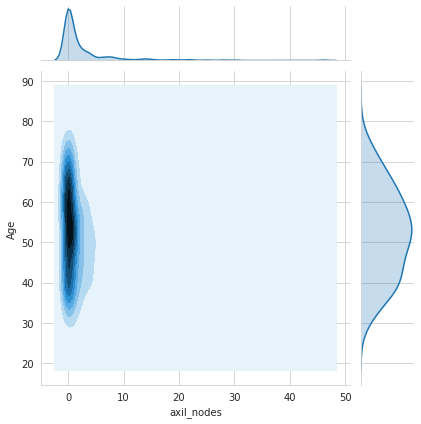

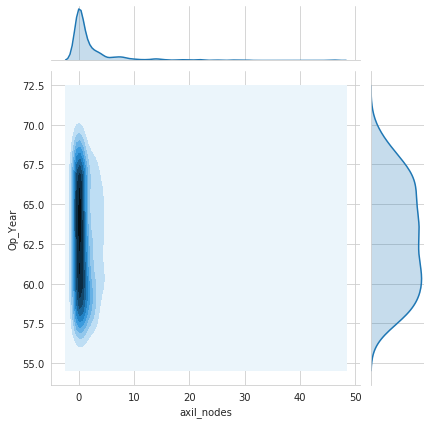

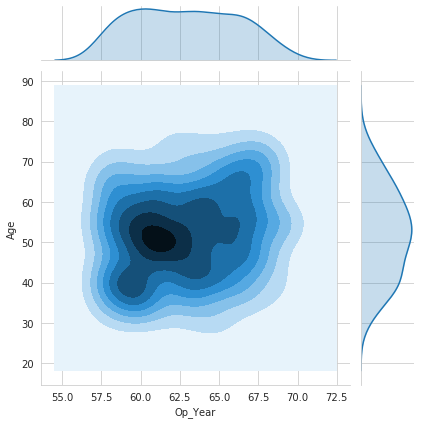

In [25]:
#2D Density plot, contors-plot
sns.jointplot(x="axil_nodes", y="Age", data=data_survived, kind="kde");
plt.show();

sns.jointplot(x="axil_nodes", y="Op_Year", data=data_survived, kind="kde");
plt.show();

sns.jointplot(x="Op_Year", y="Age", data=data_survived, kind="kde");
plt.show();

# Observations from the above 2-D Contour Plot :
- It is somewhat possible for us to classify the patients. From the Age vs Operation_Year plot we can make out that most patients who were operated between year 1960 and 1962 and aged 48 to 52, has the highest rate of survival.
- The survival rates of patients having more than 5 axillary nodes decreses a lot